# Things to Note
1. I converted the .xlsx file to a .csv file. I just prefer working with .csv files.
2. I managed to scrape a lot of functions from my other assignments for this class.
3. This assignment is depressing. Like it is really sad.


In [ ]:
# Stuff I imported into the file

import os
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [65]:
# Data Reading Functions

def path_finder(file_name):
    
    directory = os.path.dirname('__file__')
    file_directory = os.path.join(directory, file_name)
       
    file_path = file_directory
    
    try:
        csv_read = pd.read_csv(file_path)
    
    except Exception as e:
        print('Failed to load data')
        print(f'Error: {e}')
        csv_read = None
        
    return csv_read

In [66]:
# Functions that sort and analyze data

def data_sorter(data):
    
    grouped_data = {}
    
    for _, row in data.iterrows():
        
        sex = row['Sex']
        ethnicity = row['Race/Ethnicity']
        
        key = (sex, ethnicity)
    
        if key not in grouped_data:
            grouped_data[key] = []
            
        grouped_data[key].append(row.to_dict())
        
    return grouped_data

def data_analyzer(data):
    
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    
    analysis_results = {}
    
    for key, rows in data.items():
        
        sex, ethnicity = key
        key = (sex, ethnicity)

        df = pd.DataFrame(rows)
        
        stats = {
            'HIV Prevalence mean' : df['HIV_Prevalence_per_100k'].mean(skipna=True),
            'HIV Prevalence stdev' : df['HIV_Prevalence_per_100k'].std(skipna=True),
            'HIV Prevalence median' : df['HIV_Prevalence_per_100k'].median(skipna=True),
            'HIV Percent Prevalence mean' : df['HIV_Prevalence_Perc_HIV_Patients'].mean(skipna=True),
            'HIV Percent Prevalence stdev' : df['HIV_Prevalence_Perc_HIV_Patients'].std(skipna=True),
            'HIV Percent Prevalence median' : df['HIV_Prevalence_Perc_HIV_Patients'].median(skipna=True),
            'Sample Size': len(df)
        }
        
        stats = {k: float(v) if isinstance(v, np.float64) else v for k, v in stats.items()}
        
        analysis_results[key] = stats
        
    return analysis_results

# 1. Import the file “HIV_HW5.xlsx Download HIV_HW5.xlsx ” into Jupyter

In [67]:
file_name = 'CBEE 213 HW 4 HIV data.csv'
hiv_data = path_finder(file_name)

# 2. Plot the data
### A. Plot the mean and standard deviation for each treatment (sex.race/ethnicity) for the variable “HIV_Prevalence_per_100k”.

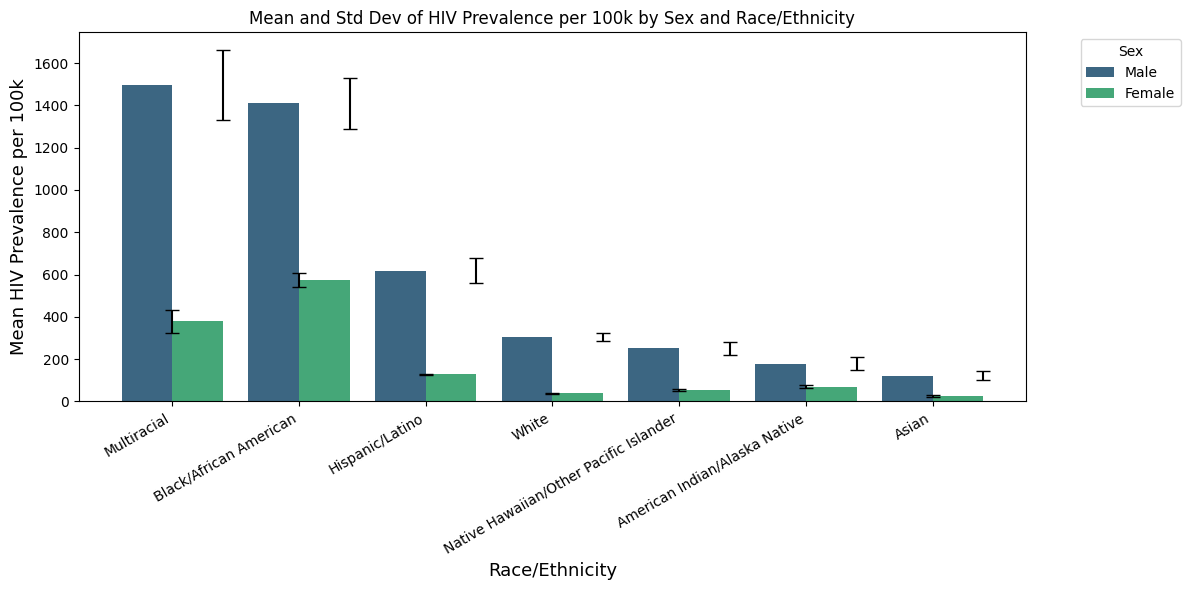

In [68]:

hiv_data_sorted = data_sorter(hiv_data)
hiv_data_analyzed = data_analyzer(hiv_data_sorted)

analyzed_df = pd.DataFrame([
    {
        'Sex': k[0],
        'Race/Ethnicity': k[1],
        'HIV_Prevalence_per_100k_mean': v['HIV Prevalence mean'],
        'HIV_Prevalence_per_100k_stdev': v['HIV Prevalence stdev'],
    }
    for k, v in hiv_data_analyzed.items()
])

analyzed_df_sorted = analyzed_df.sort_values(by='HIV_Prevalence_per_100k_mean', ascending=False)

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(
    data=analyzed_df_sorted, x='Race/Ethnicity', 
    y='HIV_Prevalence_per_100k_mean',
    hue='Sex', errorbar=None, capsize=0.1,
    palette='viridis'
)

for i, row in analyzed_df_sorted.iterrows():
    x_pos = (
        list(analyzed_df_sorted['Race/Ethnicity'].unique()).index(row['Race/Ethnicity'])
        + (0 if row['Sex'] == 'Female' else 0.4)
    )
    
    ax.errorbar(
        x=x_pos,
        y=row['HIV_Prevalence_per_100k_mean'],
        yerr=row['HIV_Prevalence_per_100k_stdev'],
        fmt='none',
        c='black',
        capsize=5,
        lw=1.5
    )

plt.ylabel('Mean HIV Prevalence per 100k', fontsize=13)
plt.xlabel('Race/Ethnicity', fontsize=13)
plt.title('Mean and Std Dev of HIV Prevalence per 100k by Sex and Race/Ethnicity')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### B. Plot the mean and standard deviation for each treatment (sex.race/ethnicity) for the variable “HIV_Prevalence_Perc_HIV_Patients”.

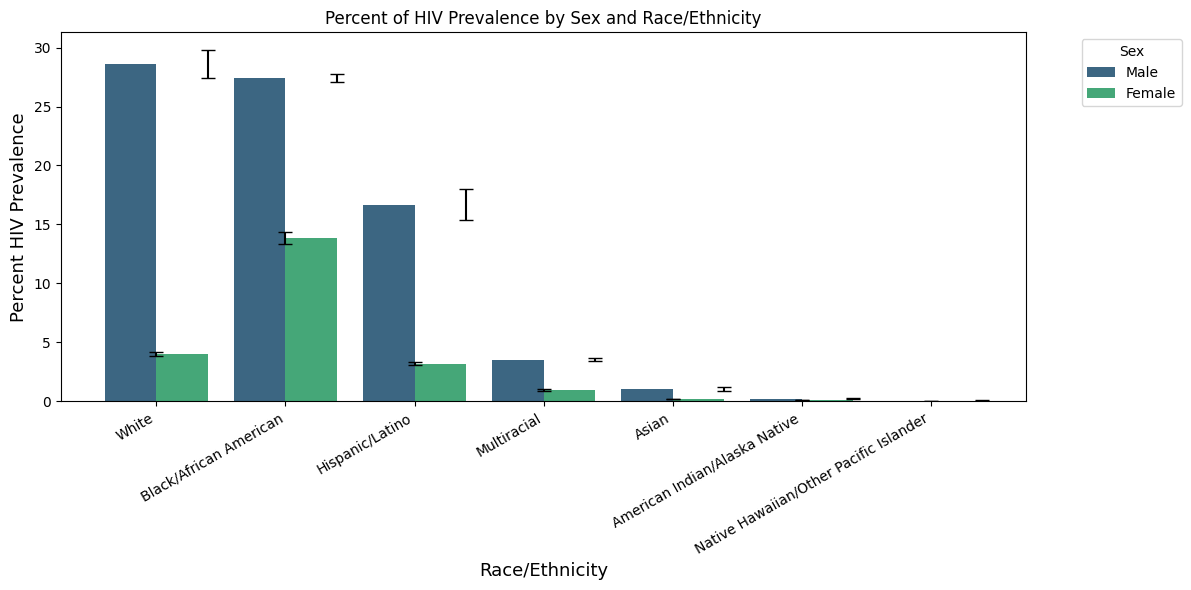

In [69]:
analyzed_df2 = pd.DataFrame([
    {
        'Sex': k[0],
        'Race/Ethnicity': k[1],
        'HIV_Prevalence_Perc_Patients_mean': v['HIV Percent Prevalence mean'],
        'HIV_Prevalence_Perc_Patients_stdev': v['HIV Percent Prevalence stdev'],
    }
    for k, v in hiv_data_analyzed.items()
])

analyzed_df_sorted = analyzed_df2.sort_values(by='HIV_Prevalence_Perc_Patients_mean', ascending=False)

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(
    data=analyzed_df_sorted, x='Race/Ethnicity', 
    y='HIV_Prevalence_Perc_Patients_mean',
    hue='Sex', errorbar=None, capsize=0.1,
    palette='viridis'
)

for i, row in analyzed_df_sorted.iterrows():
    x_pos = (
        list(analyzed_df_sorted['Race/Ethnicity'].unique()).index(row['Race/Ethnicity'])
        + (0 if row['Sex'] == 'Female' else 0.4)
    )
    
    ax.errorbar(
        x=x_pos,
        y=row['HIV_Prevalence_Perc_Patients_mean'],
        yerr=row['HIV_Prevalence_Perc_Patients_stdev'],
        fmt='none',
        c='black',
        capsize=5,
        lw=1.5
    )

plt.ylabel('Percent HIV Prevalence', fontsize=13)
plt.xlabel('Race/Ethnicity', fontsize=13)
plt.title('Percent of HIV Prevalence by Sex and Race/Ethnicity')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### C. In a markdown cell, describe which group (or groups) has the highest prevalence of HIV across measures based on your graphs.


### Difference by Sex

##### Mean Individuals with HIV per 100k
The data demonstrates Male individuals presenting significantly higher rates than Female individuals. The noteworthy exception being African American Females, who are greatly overrepresented and much closer to the Male counterpart than any other category. 

##### Percent of Individuals with HIV
Once again we see Males overwhelmingly overtaking Females in terms of representation in the data. The disparity between Male and Female participants appears even wider in the percent category, once again with the exception of African American Females, who are closer rather than farther from their Male counterparts in this data set.

### Difference by Race/Ethnicity 

##### Mean Individuals with HIV per 100k
The data shows that Multiracial and African American peoples tended to have overwhelmingly more peoples per 100k with HIV than other races/ethnicities. Latinos possessed a little less than half as many indivduals with HIV per 100k people than Multiracial and African American individuals did. After that White, Native Hawaiian/Pacific Islander, American Indian/Alaskan Native, and then Asian individuals are represented starting a little less than half of what Latino individuals are, then tapering off from there. It may be worth noting, while the general trend was for Female individuals to be less represented, African American Females were represented much higher than all other Ethnicities by a significant margin. 

##### Percent of Individuals with HIV
The data demonstrates a different trend in the Percent category than in the Individuals per 100k. When discussing percentage of individuals with HIV, White and African American males are overwhelmingly overrepresented. Latino trails behind with numbers becoming incredibly small to negligible in the order of Multiracial, Asian, American Indian/Alaskan Native, and finally Native Hawaiian/Pacific Islander. 

### Conclusions

Overwhelmingly, Males are more likely to present with HIV than are Females. This trend is consistent throughout the data, however HIV prevalence appears highest among African American individuals, with Latino individuals trailing right behind. When discussing specifically Female data, African American Females overwhelmingly over present when compared with other Races/Ethncities Females that were surveyed. Finally, the positions of Multiracial and White individuals swap between highest and fourth highest depending on whether the data is in reference to percent of individuals or individuals per 100k, but again African American and Latino remain in second and third in both data sets. 

# 3. For “HIV_Prevalence_Perc_HIV_Patients”, perform a two sample two tailed t test to determine whether HIV prevalence is different between sexes.

### A. Set up hypothesis


I hypothesize that HIV will be significantly more present in men than in women. 

### B. Calculate p value

In [70]:
male_data = hiv_data[hiv_data['Sex'] == 'Male']['HIV_Prevalence_Perc_HIV_Patients'].dropna()
female_data = hiv_data[hiv_data['Sex'] == 'Female']['HIV_Prevalence_Perc_HIV_Patients'].dropna()

def two_sample_t_test_left(sample_1, sample_2):
    
    x1_bar = np.mean(sample_1)
    x2_bar = np.mean(sample_2)
    
    s1 = np.std(sample_1, ddof=1)
    s2 = np.std(sample_2, ddof=1)
    
    n1 = len(sample_1)
    n2 = len(sample_2)
    
    t = (x1_bar - x2_bar) / np.sqrt((s1**2 / n1) + (s2**2 / n2))
    
    nu = n1 + n2 - 2
    
    p = st.t.cdf(t, df=nu)
    
    print("p-value: {}".format(p))
    
    return t, p

In [71]:
two_sample_t_test_left(female_data, male_data)

p-value: 8.672840492279183e-05


(-3.935015159679203, 8.672840492279183e-05)

### C. Interpret the finding (reject or fail to reject the null hypothesis and describe what that means regarding sex differences in HIV prevalence)


My hypothesis is that the representation of HIV is higher among Males than among Females. This means the null hypothesis is that Males and Females present at about the same rate of HIV, or that Females present at a rate higher than Males. In order to test this theory, I ran a two sample left sided t test. The test returned a p value of 8.67e-05. This is a very small p value, which means that the likely hood of observing the null hypothesis is extremely low. Therefore I can reject the null hypothesis, and confirm that Male individuals are much more likely to have HIV than Female individuals. 

TLDR; Null hypothesis rejected. Sex is a significant factor in HIV prevelance in this dataset.